In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import scipy.io

check_gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE" )

#tipos de datos 
DTYPE = 'float32'
tf.keras.backend.set_floatx(DTYPE)   #establece el tipo de float predeterminado

GPU is available


# Ecuación Allen-Cahn
Sea $\Omega = [0,1]\times [-1,1]$. Determinar $u(t,x)$ que satisfaga: 

1. $$u_t - 0.0001 \, u_{xx} + 5\, u^3 - 5\, u = 0 \hspace{0.8cm}  \text{En el interior de } \Omega$$

2. $$u(0,x) = x^2 \cos(\pi x ) $$

3. $$u(t,-1) = u(t,1) = 0 $$

4. $$u_x(t,-1) = u_x(t,1)  $$

## Solución de Referencia

In [5]:
mat = scipy.io.loadmat('./allen_cahn.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 't', 'usol', 'x'])

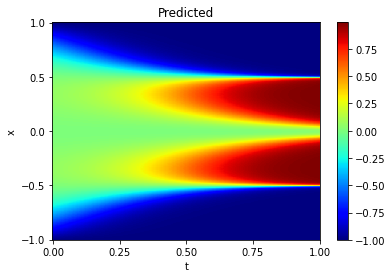

In [17]:
#Garafica solución de referencia
T, X = np.meshgrid(mat['t'].flatten(), mat['x'].flatten())
Z = mat['usol'].T
plt.figure()
cp = plt.pcolor(T, X, Z, shading='auto', cmap='jet')
plt.colorbar(cp)  # Añade una barra de color
plt.title('Predicted')
plt.xlabel('t')
plt.ylabel('x')
plt.xticks(np.linspace(0, 1, 5))
plt.yticks(np.linspace(-1, 1, 5))
plt.axis('tight')  # Ajusta los ejes al rango de los datos
plt.show()
